<center><h1>  Capstone Project  Car Accident Analysis   </h1></center>
<center><h3>  Applied Data Science Capstone by IBM/Coursera   </h3></center>
<center><h4>  By :  Mostafa Eltayeb  </h4></center>


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Visualization](#visualization)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

Car Accidents is one of major cause of mortality around the world  ,  Every day, hundreds of road **traffic accidents** occur across the country.
In fact, statistics show that there are more than 10 motor vehicle-related deaths per day in California alone, which are preventable.
Sometimes, accidents occur for a **combination of reasons**, from **bad visibility** to unsafe **road design**, or other drivers lack caution. While the causes of accidents can vary, the consequences are often the same, resulting in everything from vehicular and property damage to serious injuries.



We need to **reduce** the rate of accident by **previous warning** the driver and give them more info and precautions .  
With the aid of previous year’s datasets of similar accidents and weather conditions we can **predict the severity** of  accidents expected and prevent them or have a **quick response** .


## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* data collected from previous collisions at last year/years
* current weather condition , driver  , road .

### 2.1 Data sources

We have a dataset 
<p><b>name</b>         :  Collisions—All Years </p > 
<p><b>provided by</b>  : SPD and recorded by Traffic Records.</p>
<p><b>about</b>        :  the impact of traffic </p>  


<h5>Import Libraries</h5>

In [3]:
import pandas as pd
import numpy as np
#visualization
%matplotlib inline 
import matplotlib.pyplot as plt

<h5>Load dataset</h5>

In [4]:
df = pd.read_csv("Data-Collisions.csv")
pd.set_option('display.max_columns', None) #to show all col
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


##### Investigate dimentions , Types , columns ,rows 

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
df.shape

(194673, 38)

In [6]:
df['SEVERITYCODE.1'].value_counts()

1.0    3872
2.0    1689
Name: SEVERITYCODE.1, dtype: int64

In [7]:
df[['SEVERITYCODE.1','SEVERITYCODE']]

,SEVERITYCODE.1,SEVERITYCODE
0,2.0,2
1,1.0,1
2,1.0,1
3,1.0,1
4,2.0,2
...,...,...
5557,1.0,1
5558,1.0,1
5559,2.0,2
5560,1.0,1


<h3 id="identify_handle_missing_values">Identify and handle missing values</h3>

<h4 id="identify_missing_values">Identify missing values</h4>



<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>


In [8]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    5562
Name: SEVERITYCODE, dtype: int64

X
False    5424
True      138
Name: X, dtype: int64

Y
False    5423
True      139
Name: Y, dtype: int64

OBJECTID
False    5561
True        1
Name: OBJECTID, dtype: int64

INCKEY
False    5561
True        1
Name: INCKEY, dtype: int64

COLDETKEY
False    5561
True        1
Name: COLDETKEY, dtype: int64

REPORTNO
False    5561
True        1
Name: REPORTNO, dtype: int64

STATUS
False    5561
True        1
Name: STATUS, dtype: int64

ADDRTYPE
False    5529
True       33
Name: ADDRTYPE, dtype: int64

INTKEY
True     3751
False    1811
Name: INTKEY, dtype: int64

LOCATION
False    5502
True       60
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     3651
False    1911
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     5440
False     122
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    5561
True        1
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    5561
True        1
Name: SEVERITYDESC, dtype: int64


### 2.2 Data cleaning

###### Some columns were repeated like SEVERITYCODE and 	SEVERITYCODE.1
   So we will drop SEVERITYCODE.1


In [9]:
df = df.drop('SEVERITYCODE.1',1)
df.shape

(5562, 37)

### 2.3 Feature selection

In [10]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

**ADDRTYPE**  : Collision address type: • Alley • Block • Intersection 

**SEVERITYCODE** :  A code that corresponds to the severity of the collision

**ROADCOND**  : The condition of the road during the collision. 

**LIGHTCOND** : The light conditions during the collision. 

**SPEEDING** : Whether or not speeding was a factor in the collision. (Y/N)

In [11]:
df_acc = df[['SEVERITYCODE','ROADCOND' ,'WEATHER' ,'LIGHTCOND' ,'X', 'Y' ,'ADDRTYPE']]
df_acc.head()

,SEVERITYCODE,ROADCOND,WEATHER,LIGHTCOND,X,Y,ADDRTYPE
0,2,Wet,Overcast,Daylight,-122.323148,47.703140,Intersection
1,1,Wet,Raining,Dark - Street Lights On,-122.347294,47.647172,Block
2,1,Dry,Overcast,Daylight,-122.334540,47.607871,Block
3,1,Dry,Clear,Daylight,-122.334803,47.604803,Block
4,2,Wet,Raining,Daylight,-122.306426,47.545739,Intersection


In [12]:
df_acc['ROADCOND'].value_counts()

Dry               3625
Wet               1356
Unknown            375
Ice                 29
Snow/Slush          25
Other                4
Sand/Mud/Dirt        3
Oil                  2
Standing Water       1
Name: ROADCOND, dtype: int64

#### Drop Null values

In [13]:
len(df_acc)

5562

In [14]:
df_acc =df_acc.dropna()


In [15]:
### we need hot encoding 
df_acc['ADDRTYPE'].value_counts()
# print(df_acc['ROADCOND'].values)

Block           3527
Intersection    1752
Name: ADDRTYPE, dtype: int64

### Label encoding

#### we need to use label encode to make dataset ready for analysis

In [16]:
df_acc['WEATHER'].value_counts()


# WEATHER_CAT_ids = [0, 1, 2, 3,4, 5, 6,7,8,9,10]
WEATHER_CAT = {'Clear':0, 'Raining':1, 'Overcast':2, 'Unknown':3, 'Snowing':4 ,   'Other':5 ,'Fog/Smog/Smoke':6  ,'Sleet/Hail/Freezing Rain':7 ,'Blowing Sand/Dirt':8 ,'Severe Crosswind' :9,'Partly Cloudy':10}

ROADCOND_CAT  = {'Dry':0, 'Wet':1, 'Unknown':2, 'Ice':3, 'Snow/Slush':4 ,   'Other':5 ,'Standing Water':6  ,'Sand/Mud/Dirt':7
             ,'Oil':8 }


LIGHTCOND_CAT = {'Daylight':0, 'Dark - Street Lights On':1, 'Unknown':2, 'Dusk':3, 'Dawn':4 ,   'Dark - No Street Lights':5 
             ,'Dark - Street Lights Off':6  ,'Other':7
             ,'Dark - Unknown Lighting':8 }

ADDRTYPE_CAT = {'Block':0, 'Intersection':1}

# len(WEATHER_CAT)
# len(WEATHER_CAT_ids)
df_acc['WEATHER_CAT'] = df_acc['WEATHER'].replace(WEATHER_CAT)
df_acc['ROADCOND_CAT'] = df_acc['ROADCOND'].replace(ROADCOND_CAT)
df_acc['LIGHTCOND_CAT'] = df_acc['LIGHTCOND'].replace(LIGHTCOND_CAT)
df_acc['ADDRTYPE_CAT'] = df_acc['ADDRTYPE'].replace(ADDRTYPE_CAT)

df_acc = df_acc.astype({"WEATHER_CAT": int})
df_acc = df_acc.astype({"ROADCOND_CAT": int})
df_acc = df_acc.astype({"LIGHTCOND_CAT": int})
df_acc = df_acc.astype({"ADDRTYPE_CAT": int})
df_acc
# df_we = pd.DataFrame(list(zip(WEATHER_CAT_ids, WEATHER_CAT)),
#                   columns=['WEATHER_CAT_ids', 'WEATHER_CAT'])
# df = pd.merge(df ,df_we)

,SEVERITYCODE,ROADCOND,WEATHER,LIGHTCOND,X,Y,ADDRTYPE,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT,ADDRTYPE_CAT
0,2,Wet,Overcast,Daylight,-122.323148,47.703140,Intersection,2,1,0,1
1,1,Wet,Raining,Dark - Street Lights On,-122.347294,47.647172,Block,1,1,1,0
2,1,Dry,Overcast,Daylight,-122.334540,47.607871,Block,2,0,0,0
3,1,Dry,Clear,Daylight,-122.334803,47.604803,Block,0,0,0,0
4,2,Wet,Raining,Daylight,-122.306426,47.545739,Intersection,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5556,2,Dry,Clear,Daylight,-122.359398,47.697849,Intersection,0,0,0,1
5557,1,Dry,Clear,Daylight,-122.268968,47.538904,Block,0,0,0,0
5558,1,Dry,Overcast,Daylight,-122.305693,47.604331,Block,2,0,0,0
5559,2,Dry,Clear,Daylight,-122.301865,47.719316,Intersection,0,0,0,1


### Data Visualization <a name="visualization"></a>

In [8]:
import matplotlib.pyplot as plt
df_acc["SEVERITYCODE"].plot(kind='hist')


plt.title("Frequence of Road condition")
plt.xlabel('Severity code Values')
plt.ylabel('Frequence')


plt.show()

NameError: name 'df_acc' is not defined

### we notice here that the data sample is unbalanced and we need to blance it 

### Balance the Data 

In [18]:
g = df_acc.groupby('SEVERITYCODE')
df_acc =g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

#### plot the severity code after balancing

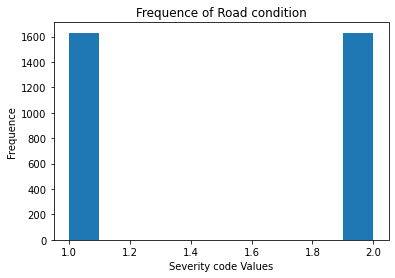

In [19]:
import matplotlib.pyplot as plt
df_acc["SEVERITYCODE"].plot(kind='hist')


plt.title("Frequence of Road condition")
plt.xlabel('Severity code Values')
plt.ylabel('Frequence')


plt.show()

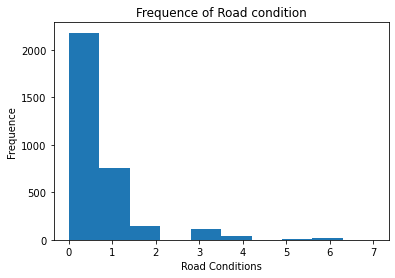

In [20]:
import matplotlib.pyplot as plt
df_acc["LIGHTCOND_CAT"].plot(kind='hist')


plt.title("Frequence of Road condition")
plt.xlabel('Road Conditions')
plt.ylabel('Frequence')


plt.show()

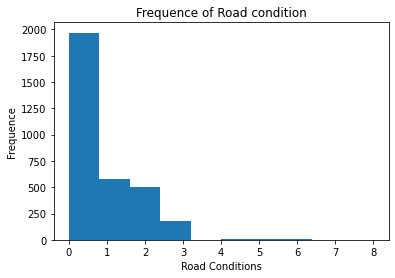

In [21]:
import matplotlib.pyplot as plt
df_acc["WEATHER_CAT"].plot(kind='hist')


plt.title("Frequence of Road condition")
plt.xlabel('Road Conditions')
plt.ylabel('Frequence')


plt.show()

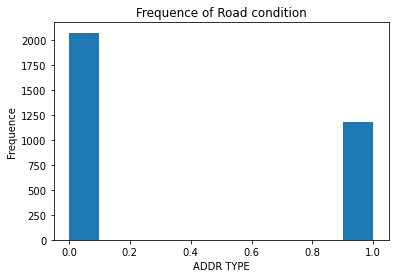

In [22]:

import matplotlib.pyplot as plt
df_acc["ADDRTYPE_CAT"].plot(kind='hist')


plt.title("Frequence of Road condition")
plt.xlabel('ADDR TYPE')
plt.ylabel('Frequence')


plt.show()

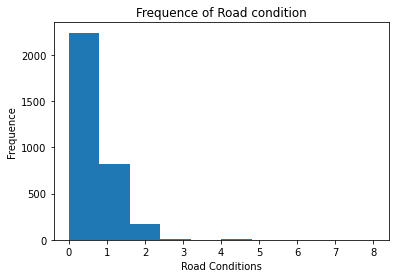

In [23]:

import matplotlib.pyplot as plt
df_acc["ROADCOND_CAT"].plot(kind='hist')


plt.title("Frequence of Road condition")
plt.xlabel('Road Conditions')
plt.ylabel('Frequence')


plt.show()

In [24]:
# df_acc["ROADCOND"] =pd.get_dummies(df_acc["ROADCOND"])
# pd.get_dummies(data=df_acc, columns=['ROADCOND', 'WEATHER','LIGHTCOND' ,'ADDRTYPE'])

## Methodology <a name="Methodology"></a>

## Classification Model 

### 1- K-Nearest Neighbors


Lets load required libraries

In [59]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [60]:
#### Let’s see how many of each class is in our data set
df_acc['SEVERITYCODE'].value_counts()

1    1630
2    1630
Name: SEVERITYCODE, dtype: int64

### Feature set
Lets define feature sets, X:
To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [61]:
X = df_acc[['ROADCOND_CAT' ,'WEATHER_CAT' ,'LIGHTCOND_CAT' ,'ADDRTYPE_CAT']] .values.astype(float)
X[0:5]

array([[0., 0., 0., 0.],
       [1., 2., 0., 1.],
       [1., 1., 0., 1.],
       [0., 2., 4., 1.],
       [1., 1., 0., 0.]])

In [62]:
#### What are our labels?
y = df_acc['SEVERITYCODE'].values.astype(float)
y[0:5]

array([1., 1., 1., 1., 1.])

### Normalize Data
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [63]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.56445826, -0.67492332, -0.53869096, -0.75469961],
       [ 0.85649459,  1.24669242, -0.53869096,  1.3250305 ],
       [ 0.85649459,  0.28588455, -0.53869096,  1.3250305 ],
       [-0.56445826,  1.24669242,  3.58368588,  1.3250305 ],
       [ 0.85649459,  0.28588455, -0.53869096, -0.75469961]])

### Train Test Split

In [64]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2608, 4) (2608,)
Test set: (652, 4) (652,)


#### Classification

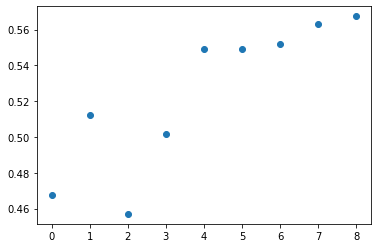

In [65]:

ran = range(9)
jac = []
for k in ran:
    neigh = KNeighborsClassifier(n_neighbors = k + 1).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    jac.append(accuracy_score(y_test, yhat))

plt.scatter(ran, jac)

In [66]:
# 7 Neighbors was most accurate so repeat the fitting with 2 neighbors and all the test data

knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)

# Decision Tree

In [67]:


# Create Tree
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
dt_yhat = tree.predict(X_test)
dt_yhat

array([2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2.,
       2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2.,
       1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2.,
       1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
       1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2.,
       2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
       1., 1., 1., 1., 1.

# Support Vector Machine

In [69]:
from sklearn.svm import SVC

In [36]:
svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
svm_yhat = svm.predict(X_test)
svm_yhat

array([2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2.,
       2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2.,
       1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2.,
       1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
       1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2.,
       2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
       1., 1., 2., 1., 1.

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
y_train_bi = y_train


y_test_bi = y_test

#Fit and optimize the model by changing C to minimum log loss:
cees = [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.015, 0.2, 0.3, 0.4]
ll = []
for i in range(len(cees)):
    LR = LogisticRegression(C = cees[i], solver = 'liblinear')
    LR = LR.fit(X_train, y_train_bi)
    LR_yhat = LR.predict(X_test)
    ll.append(log_loss(y_test_bi, LR_yhat))
    
ll

[17.905485713820884,
 17.905485713820884,
 17.905485713820884,
 17.905485713820884,
 17.905485713820884,
 17.905485713820884,
 17.905485713820884,
 17.905485713820884,
 17.905485713820884,
 17.905485713820884]

In [70]:
# Log loss is minimized at C of 0.2 so I will use this model. I refit with all test data
LR = LogisticRegression(C = 0.2, solver = 'liblinear')
LR = LR.fit(X, y)

# Model Evaluation using Test set

In [71]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.23.2)
Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
!conda install python-graphviz --yes
import graphviz
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.tree import export_graphviz
import itertools


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [73]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [77]:
df_test = pd.read_csv('Data-Collisions.csv')
df_test = df_test.drop('SEVERITYCODE.1',1)

df_acc_test = df_test[['SEVERITYCODE','ROADCOND' ,'WEATHER' ,'LIGHTCOND' ,'X', 'Y' ,'ADDRTYPE']]

df_acc_test =df_acc_test.dropna()


# WEATHER_CAT_ids = [0, 1, 2, 3,4, 5, 6,7,8,9,10]
WEATHER_CAT = {'Clear':0, 'Raining':1, 'Overcast':2, 'Unknown':3, 'Snowing':4 ,   'Other':5 ,'Fog/Smog/Smoke':6  ,'Sleet/Hail/Freezing Rain':7 ,'Blowing Sand/Dirt':8 ,'Severe Crosswind' :9,'Partly Cloudy':10}

ROADCOND_CAT  = {'Dry':0, 'Wet':1, 'Unknown':2, 'Ice':3, 'Snow/Slush':4 ,   'Other':5 ,'Standing Water':6  ,'Sand/Mud/Dirt':7
             ,'Oil':8 }


LIGHTCOND_CAT = {'Daylight':0, 'Dark - Street Lights On':1, 'Unknown':2, 'Dusk':3, 'Dawn':4 ,   'Dark - No Street Lights':5 
             ,'Dark - Street Lights Off':6  ,'Other':7
             ,'Dark - Unknown Lighting':8 }

ADDRTYPE_CAT = {'Block':0, 'Intersection':1}

# len(WEATHER_CAT)
# len(WEATHER_CAT_ids)
df_acc_test['WEATHER_CAT'] = df_acc_test['WEATHER'].replace(WEATHER_CAT)
df_acc_test['ROADCOND_CAT'] = df_acc_test['ROADCOND'].replace(ROADCOND_CAT)
df_acc_test['LIGHTCOND_CAT'] = df_acc_test['LIGHTCOND'].replace(LIGHTCOND_CAT)
df_acc_test['ADDRTYPE_CAT'] = df_acc_test['ADDRTYPE'].replace(ADDRTYPE_CAT)

df_acc_test = df_acc_test.astype({"WEATHER_CAT": int})
df_acc_test = df_acc_test.astype({"ROADCOND_CAT": int})
df_acc_test = df_acc_test.astype({"LIGHTCOND_CAT": int})
df_acc_test = df_acc_test.astype({"ADDRTYPE_CAT": int})
df_acc_test

Xtest = df_acc_test[['ROADCOND_CAT' ,'WEATHER_CAT' ,'LIGHTCOND_CAT' ,'ADDRTYPE_CAT']] .values.astype(float)
Xtest[0:5]

ytest = df_acc_test['SEVERITYCODE'].values.astype(float)
y[0:5]

Xtest = preprocessing.StandardScaler().fit(Xtest).transform(Xtest.astype(float))
Xtest[0:5]



ytest_bi = ytest
# ytest_bi = np.where(ytest_bi == 'COLLECTION', 1, np.where(ytest_bi == 'PAIDOFF', 0, ytest_bi))
ytest_bi = ytest_bi.astype('int')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
knn_yhat = knn.predict(Xtest)
knn_jaccard = accuracy_score(ytest, knn_yhat)
knn_f1 = f1_score(ytest, knn_yhat, average = None)
knn_f1 = knn_f1.sum()/2

In [79]:


# Create Tree
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
tree.fit(X, y)
tree_yhat = tree.predict(Xtest)
tree_jaccard = accuracy_score(ytest, tree_yhat)
tree_f1 = f1_score(ytest, tree_yhat, average = None)
tree_f1 = tree_f1.sum()/2

In [80]:
svm_yhat = svm.predict(Xtest)
svm_jaccard = accuracy_score(ytest, svm_yhat)
svm_f1 = f1_score(ytest, svm_yhat, average = None)
svm_f1 = svm_f1.sum()/2

In [81]:
ytest_bi

array([2, 1, 1, ..., 1, 1, 1])

In [82]:
LR_yhat = LR.predict(Xtest)
LR_yhat = np.where(LR_yhat == 'COLLECTION', 1, np.where(LR_yhat == 'PAIDOFF', 0, LR_yhat))
LR_yhat = LR_yhat.astype('int')
LR_jaccard = accuracy_score(ytest_bi, LR_yhat)
LR_f1 = f1_score(ytest_bi, LR_yhat, average = None).sum()/2

LR_ll = log_loss(ytest, LR_yhat)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [83]:
df_results = pd.DataFrame(columns = ['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'])
df_results['Algorithm'] = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
df_results['Jaccard'] = [knn_jaccard, tree_jaccard, svm_jaccard, LR_jaccard]
df_results['F1-score'] = [knn_f1, tree_f1, svm_f1, LR_f1]
df_results['LogLoss'] = ['NA', 'NA', 'NA', LR_ll]

df_results

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.672727,0.509295,NA
1,Decision Tree,0.659342,0.603268,NA
2,SVM,0.656523,0.601756,NA
3,Logistic Regression,0.659386,0.602881,24.2043


# Result and Discussion

Our analysis shows that we can predict the **Accident severity** with accuracy around **0.67** based on our dataset  ,and using classification models like decission tree , k-value ,Logistic Regression 

# Conclusion and future directions <a name="conclusion"></a>

Purpose of this project was to  analyzed the relationship between various features and Traffic Accident Severity. Using classification models to predict Traffic Accident Severity. 

We Can in the future enhance the accuracy of these models using more analytics methods and methodologies.